<a href="https://colab.research.google.com/github/frecklehead/LinearRegression-from-scratch/blob/master/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
class Linear_Regression:
  def __init__(self,learning_rate,no_of_epochs):#constructor
    self.learning_rate=learning_rate
    self.no_of_epochs=no_of_epochs

  def fit(self,X,Y):#fit the data to our model
    #number of training examples and features of the data
    self.m,self.n=X.shape #no of rows and columns
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    for i in range(self.no_of_epochs):
      self.update_weights()

  def update_weights(self):#update the weights
    Y_prediction= self.predict(self.X)
    dw=-(2* (self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db



  def predict(self,X):
    return X.dot(self.w)+self.b




In [ ]:
# class Linear_Regression:
#   def __init__(learning_rate, number_of_epochs):
#     self.learning_rate=learning_rate
#     self.number_of_epochs=number_of_epochs
#   def fit(self,X,Y):
#     self.m, self.n=X.shape;
#     self.w=np.zeros(self.n)
#     self.b=0
#     self.X=X
#     self.Y=Y
#     for i in range(self.number_of_epochs):
#       update_w()

#   def update_w():
#     Y_prediction= self.predict(self.X)

#     dw= -(2* (self.X.T).dot(self.Y-Y-prediction))/self.m
#     db=-2* np.sum(self.Y-Y_prediction)/self.m

#     self.w=self.w-self.learning_rate*dw
#     self.b=self.b-self.learning_rate*db

#   def predict(self,X):
#     return X.dot(self.w)+self.b;



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#data pre-processing
df=pd.read_csv("/content/salary_data.csv")
df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
class Logistic_Regression:
 def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
 def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.no_of_iterations):
      self.update_weights()
 def update_weights(self):
      Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))
      dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
      db = (1/self.m)*np.sum(Y_hat - self.Y)
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db
 def predict(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

























SVM from scratch

In [ ]:
class SVM_classifier():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter
  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.no_of_iterations):
      self.update_weights()
  def update_weights(self):
    y_label = np.where(self.Y <= 0, -1, 1)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
      if condition:
        dw = 2 * self.lambda_parameter * self.w
        db = 0
      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat


Knn

In [ ]:
class KNN_Classifier():
  def __init__(self, distance_metric):
    self.distance_metric = distance_metric

  def get_distance_metric(self, training_data_point, test_data_point):
    if self.distance_metric == 'euclidean':
      dist = 0
      for i in range(len(training_data_point) - 1):
        dist += (training_data_point[i] - test_data_point[i]) ** 2
      return np.sqrt(dist)

    elif self.distance_metric == 'manhattan':
      dist = 0
      for i in range(len(training_data_point) - 1):
        dist += abs(training_data_point[i] - test_data_point[i])
      return dist

  def nearest_neighbors(self, X_train, test_data, k):
    distance_list = []
    for training_data in X_train:
      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))
    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []
    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list

  def predict(self, X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    label = []
    for data in neighbors:
      label.append(data[-1])
    return statistics.mode(label)


In [ ]:
df.shape


(30, 2)

In [ ]:
# checking for the missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
X=df.iloc[:,:-1].values

Y=df.iloc[:,1].values
print(X)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
#splitting the data into trainig and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
model=Linear_Regression(learning_rate=0.01,no_of_epochs=1000)
model.fit(X_train,Y_train)


9380.83169121881


In [ ]:
#test data prediction
test_data_prediction=model.predict(X_test)

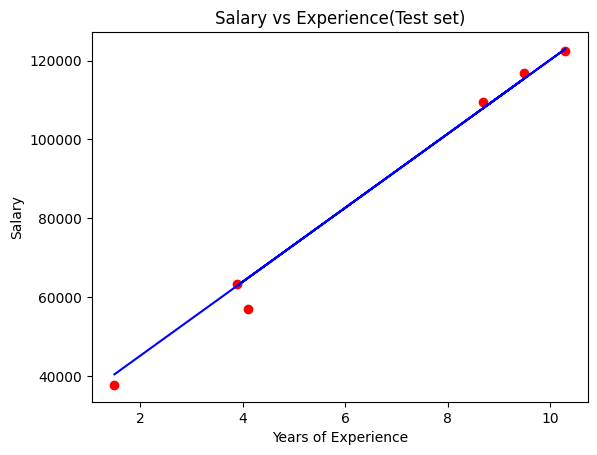

In [ ]:
#Visualizing the predicted and actual values
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()